# In-Depth: Support Vector Machines

Support vector machines (SVMs) are a particularly `powerful and flexible` class of **supervised algorithms** for both **classification** and **regression**.

## Basic idea
just like 1-layer or multi-layer neural nets
- Optimal hyperplane for **linearly separable** patterns
- Extend to patterns that are **not linearly separable** by transformations of original data to `map into new space` -- the **Kernel** function

## SVM vs Neural Networks

<img align="left" style="padding-right:10px;" src="figures/svn-as.mlp.png">  
In simplest manner, **svm without kernel** is a **single neural network neuron** but with different cost function. 

If you **add a kernel function**, then it is comparable with **2 layer neural nets**.  
First layer is able to project data into some other space and next layer classifies the projected data. 

If you force to have one more layer then you might **ensemble multiple kernel svms** then you mimics **3 layer nn**.

## Motivating Support Vector Machines

* Support Vector Machine (SVM) is a `Discriminative classification`,  
finds a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

## Recall from 1-layer nets : Which Separating Hyperplane?
* In general, lots of possible solutions for a,b,c (an **infinite number**!)
* SVM finds an **optimal solution**

<img align="rigth" style="padding-left:10px;" src="figures/hyperplanes.png" width="50%">  

### An example 
consider the **simple** case of a **classification task**, in which the two classes of points are well separated:

### Import libs

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Create a simple 2D problems

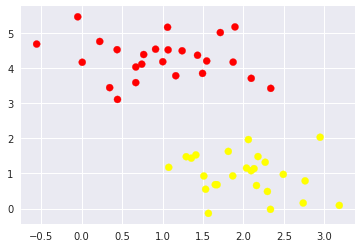

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Linear discriminative classifier
* draws a straight **line separating the two sets** of data, and thereby **create a model** for classification.
* **Problem**: there is **more than one** possible dividing **line** that can perfectly discriminate between the two classes!

We can draw them as follows:

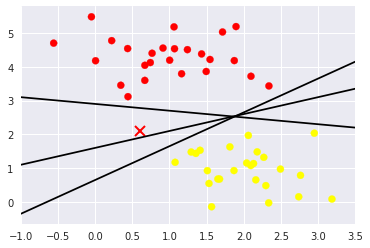

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Problem
* These are **three *very* different separators** which, nevertheless, perfectly discriminate between these samples.
* Depending on which you choose, a **new data point** (e.g., the one marked by the "X" in this plot) will be assigned a different label!

Evidently our simple intuition of "`drawing a line between classes`" is **not enough**, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the *Margin*

* **Intuition**:  
rather than simply drawing a **zero-width line** between the classes,  
we can draw around each line a **margin** of some width, up to the nearest point.

Here is an example of how this might look:

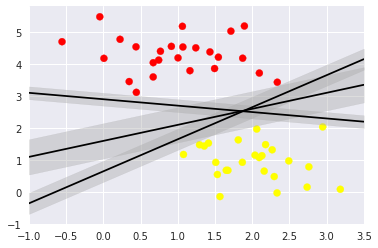

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Maximum margin
In support vector machines, 
* the **line that maximizes this margin** is the one we will choose as the **optimal model**.
* Support vector machines are an example of such a *maximum margin* estimator.

### General input/output for SVMs just like for neural nets, but for one important addition…
* **Input**: set of (input, output) training pair samples; call the input sample features $x_1, x_2, \dots x_n$, and the output result $y$.  
Typically, there can be lots of input features $x_i$.
* **Output**: set of weights $w_i$, one for each feature, whose linear combination predicts the value of $y$. (So far, just like neural nets...)
* **Important difference**: SVM uses the optimization of **maximizing the margin** (‘`street width`’) in deciding the separating line(hyperplane)

### Definitions
<img align="right" style="padding-left:10px;" src="figures/hyperplanes-svm.png" width="40%">
Define the hyperplanes $H$ such that:<br>
$w\cdot x_i +b ≥ +1$ when $y_i = +1$ <br>
$w\cdot x_i +b ≤ -1$ when $y_i = –1$ <br>

$H_1$ and $H_2$ are the planes:<br>
$H_1$: $w\cdot x_i +b = +1$<br>
$H_2$: $w\cdot x_i +b = –1$ <br>

The points on the planes $H_1$ and $H_2$ are the tips of the Support Vectors.  
The plane $H_0$ is the median in between, where $w\cdot x_i+b =0$
* $d+ =$ the shortest distance to the closest positive point
* $d- =$ the shortest distance to the closest negative point  
The margin of a separating hyperplane is $d+ + d–$.

### Moving input vectors

Moving a support vector moves the decision boundary <br>
Moving the other vectors has no effect <br>

<img src="figures/moving-input-vectors.png" width="60%">

### Maximizing the margin (street width)

We want a classifier (linear separator) with as big a margin as possible. <img align="right" style="padding-left:10px;" src="figures/hyperplanes-svm.png" width="40%">

Recall the distance from a point $(x_0,y_0)$ to a line $Ax+By+c = 0$ is: <br>
$$\frac{|Ax_0 +By_0 +c|}{\sqrt{(A^2+B^2)}}$$ <br>
so,
the distance between $H_0$ and $H_1$ is then:<br>
$$\frac{|w\cdot x+b|}{\|w\|}=\frac{1}{\|w\|}$$ <br> 


### Maximizing the margin (street width)

...so, the total distance between $H_1$ and $H_2$ is thus: <img align="right" style="padding-left:10px;" src="figures/hyperplanes-svm.png" width="40%">
$$\frac{2}{\|w\|}$$

In order to **maximize the margin**, we thus need to **minimize** $\|w\|$.  <br> 
With the condition that there are no datapoints between $H_1$ and $H_2$: <br>
$\mathbf{x}_i\cdot \mathbf{w}+b ≥ +1$ when $y_i=+1$ <br>
$\mathbf{x}_i\cdot \mathbf{w}+b\leq –1$ when $y_i =–1$ <br> 
Can be combined into: <br>
$$y_i (x_i\cdot w + b) > 1$$

### Compute the margin
Given a positive example $(x^+, 1)$ and a negative example $(x^−, −1)$ closer to $H$,  
we have
* $w \cdot x^+ + b = 1$
* $w \cdot x^- + b = -1$

So the margin is computing as follow
$$d^+=|dist(x^+,H)|=\frac{|w\cdot x^+ +b|}{\|w\|}=\frac{1}{\|w\|}$$ <br>
$$d^-=|dist(x^-,H)|=\frac{|w\cdot x^- +b|}{\|w\|}=\frac{1}{\|w\|}$$ <br>
* Margin = $2 / \|w\|$


### Support vectors
All the $x_i$ in the training set s.t. $|dist(x_i, H)| = 1$ are called **support vectors** for $H$

### We now must solve a quadratic programming problem (linear separable)

* **Problem is**: minimize $\|w\|$, s.t. discrimination boundary is obeyed, 
* which we can rewrite as (Note this is a quadratic function):
$$\min \frac{1}{2}\|\mathbf{w}\|^2$$
$$y_i (x_i\cdot \mathbf{w} + b) \ge 1  ~~~~~~~ i=1\dots m$$

This is a  quadratic optimization problem with linear constraints.

### Find a “good” hyperplane when the problem is not linear separable

**Problema**: not all the constraints  $y_i (w \cdot x_i +b) ≥ 1$ can be satisfied for all $i$ (data are not linear separable)

**Soluzione**:  "`slack`" variables in a quadratic problem.  
Modeling potential errors: introducing **slack** variables $\xi_i$ (xi)

* **no error**: $y_i(w\cdot x_i + b) ≥ 1 ⇒ \xi_i = 0$
* **error**: 
  * $w · x_i + b ≥ +1 − ξ_i ~~~~ i : y_i = +1$
  * $w · x_i + b ≤ −1 + ξ_i ~~~~ i : y_i = −1$
  * $ξ_i ≥ 0 ~~~~ i = 1, ..., m$

### Solution

$$\min_{w,b,\xi_1 ...\xi_m} \frac{1}{2}\|\mathbf{w}\|^2 + C\#|i : \xi_i > 1|$$

Note: $\#|i : ξ_i > 1| ≤ m$

so we the follow definition of a SVM:

$$\min_{w,b,\xi_1 ...\xi_m} \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^m{\xi_i}$$




<img src="figures/svn_C_param.png" width="80%">

## Fitting a support vector machine using Scikit-Learn

Let's see the result of an actual fit to this data: 
* we will use Scikit-Learn's support vector classifier to train an SVM model on this data.

For the time being, we will use a **linear kernel** and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Utility function
To better visualize what's happening here,  
let's create a quick convenience **function** that will **plot SVM decision boundaries** for us:

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

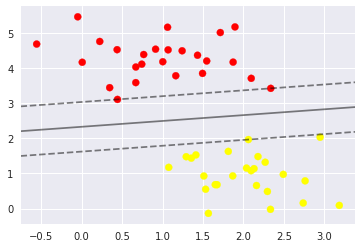

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

### Support vectors
This is the **dividing line** that `maximizes the margin between the two sets of points`.  
> Notice that a few of the **training points just touch the margin**.  

These points are known as the **support vectors**, and give the algorithm its name.

In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Plot the model
* A key to this **classifier's success** is that for the fit, **only the position of the support vectors matter**; 
* any points further from the margin which are on the correct side do not modify the fit!  
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we **plot the model** learned from the `first 60 points` and `first 120 points` of this dataset:

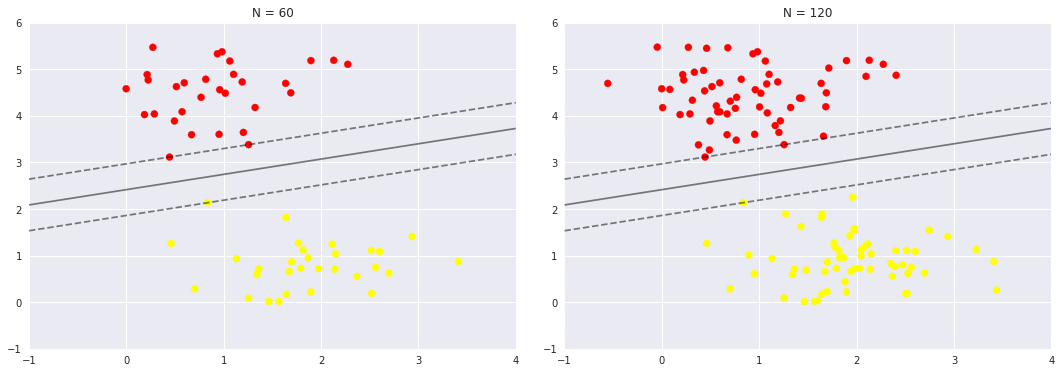

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### One strength of the SVM model
* In the left panel, we see the model and the support vectors for **60 training points**.
* In the right panel, we have **doubled** the number of **training points**, but the model has not changed: 
  * the three **support vectors** from the left panel **are still the same** support vectors from the right panel.
  
This **insensitivity** to the exact behavior of distant points is one of the **strengths of the SVM model**.

### Interactive mode
If you are running this notebook live, you can use IPython's interactive widgets to view this feature of the SVM model interactively:

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Output()), _dom_classes=('w…

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with **kernels**.  

To motivate the need for kernels, let's look at some data that is **not linearly separable**:

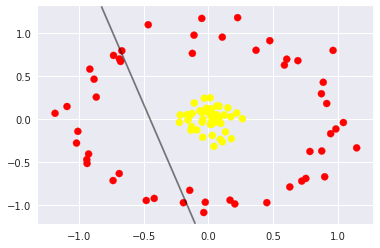

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Project the data into a higher dimension
* It is clear that **no linear discrimination** will *ever* be able to separate this data.
* But we can think about how we might **project the data into a higher dimension** such that a linear separator *would* be sufficient.

For **example**, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

In [12]:
r = np.exp(-(X ** 2).sum(axis=1))

### 3D Visualization  
We can visualize this extra data dimension using a three-dimensional:

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-30,0, 30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=2, options=(-30, 0, 30), value=30), IntSlider(value=3…

### Data becomes linearly separable
We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, *r*=0.7.

Here we had to **choose and carefully tune our projection**: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results.  
**Problem**: we would like to somehow **automatically find the best basis functions** to use.

This type of basis function transformation is known as a **kernel transformation**, as it is based on a similarity relationship (or kernel) between each pair of points.

In Scikit-Learn, we can apply kernelized SVM simply by changing our **linear kernel** to an **RBF** (radial basis function) kernel, using the ``kernel`` model hyperparameter:

In [14]:
clf = SVC(kernel='rbf', C=1E6, gamma='scale')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

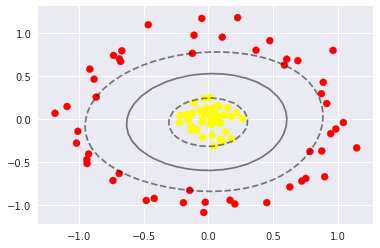

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Learn nonlinear decision boundary
Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.

This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods.

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.

But what if your **data has** some amount of **overlap**?

For `example`, you may have data like this:

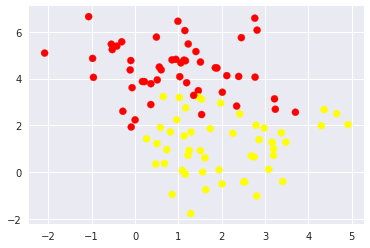

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

###  Softening Margins Parameter

* SVM allows some of the points to stay **into the margin** if that allows a better fit.
* The hardness of the margin is controlled by a **tuning parameter**, most often known as $C$.
  * For **very large** $C$, the margin is hard, and points cannot lie in it.
  * For **smaller** $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

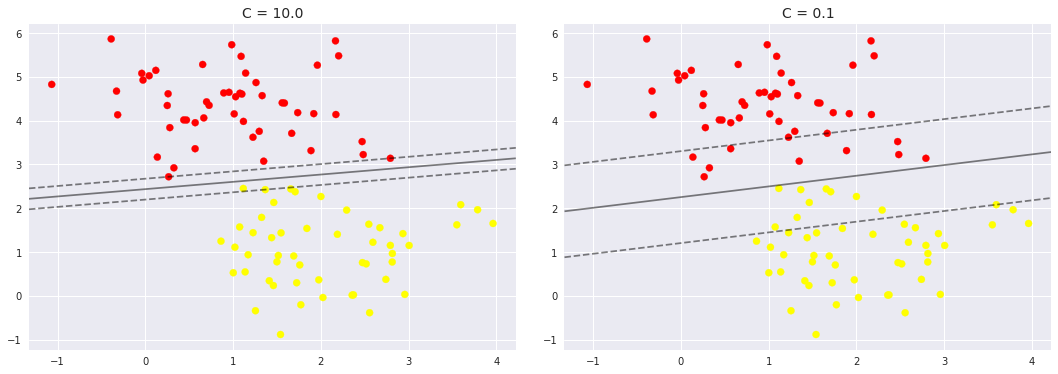

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Tune the parameter
The optimal value of the $C$ parameter will **depend on your dataset**, and should be **tuned** using 
* cross-validation 
* similar procedure (refer back to `Hyperparameters and Model Validation`)

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.

We will use the `Labeled Faces in the Wild` (LFW) dataset, which consists of several thousand collated photos of various public figures.

A fetcher for the dataset is built into Scikit-Learn:

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['George W Bush' 'Gerhard Schroeder']
(639, 62, 47)


Let's **plot a few** of these **faces** to see what we're working with:

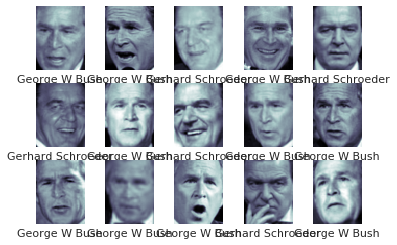

In [19]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
* We could proceed by simply **using each pixel** value as a feature
* often it is more effective to use some sort of **preprocessor** to extract more meaningful features; 
* We will use **Principal Component Analysis** (PCA) to extract 150 fundamental components to feed into our support vector machine classifier.

We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Split data
For the sake of testing our classifier output, we will split the data into a **training** and **testing** set:

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Grid search

* Finally, we can use a grid search cross-validation to explore combinations of parameters.
* Here we will adjust 
  * ``C`` (which controls the margin hardness) 
  * ``gamma`` (which controls the size of the radial basis function kernel), 
  
and determine the best model:

In [22]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=5, iid=False)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 54.1 s, sys: 23.8 s, total: 1min 17s
Wall time: 22.6 s
{'svc__C': 1, 'svc__gamma': 0.005}


### Optimal values

The **optimal values** fall toward the **middle of our grid**; 
* if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [23]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### Test
Let's take a look at a few of the test images along with their predicted values:

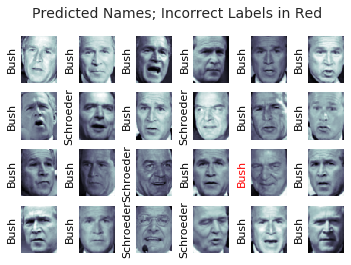

In [24]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    yfit_int=round(yfit[i])
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit_int].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
#     axi.set_ylabel(yfit_int, color='black' if yfit_int == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Results
* Out of this small sample, our optimal estimator **mislabeled** a few faces.
* We can get a better sense of our estimator's performance using the **classification report**, which lists recovery statistics label by label:

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

    George W Bush       0.97      0.99      0.98       138
Gerhard Schroeder       0.95      0.82      0.88        22

        micro avg       0.97      0.97      0.97       160
        macro avg       0.96      0.91      0.93       160
     weighted avg       0.97      0.97      0.97       160



### Confusion Matrix
We might also display the confusion matrix between these classes.

This helps us get a sense of which labels are likely to be confused by the estimator.

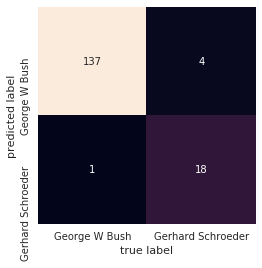

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Support Vector Machine: advantages

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively **few support vectors** means that they are very compact models, and take up very little memory.
- Once the model is trained, the **prediction phase is very fast**.
- Because they are affected only by points near the margin, they **work well with high-dimensional data**.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.


## Support Vector Machine: disadvantages

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this **computational cost can be prohibitive**.
- The results are **strongly dependent** on a suitable choice for the **softening parameter** $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, I generally only turn to SVMs once 
* other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.

<div class="alert alert-success">
    
## Practice 
* Compare SVC model changing 
  * the kernel parameter in `'linear', 'rbf', 'poly'`
  * the C parameter in [0.01, 0.1, 1, 10, 100]
* plot the SVC decision boundary 
* Use the IRIS dataset 

</div>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2] # two features
y = y[y != 0] # two classes problem

# write your code here
# ...